In [1]:
#本文是逻辑回归算法实现
import numpy as np
import matplotlib.pyplot as plt

#load data from file导入txt数据
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        col_num = len(lineArr)
        temp = []
        for i in range(col_num):
            temp.append(float(lineArr[i]))
        data.append(temp)

    return np.array(data)

In [2]:
# 可视化训练集
def draw_data(data):
    X = data[:,:-1]
    Y = data[:,-1:]
    data_0 = np.where(Y.ravel()==0)
    data_1 = np.where(Y.ravel()==1)
    plt.scatter(X[data_0,0],X[data_0,1],marker='o',color='y',label='Not Admitted')
    plt.scatter(X[data_1,0],X[data_1,1],marker='+',color='black',label='Admitted')
    plt.xlabel('score1')
    plt.ylabel('score2')
    plt.legend()
    plt.show()
    
#可视化线性的决策边界
def draw_result(X,Y):
    label = np.array(Y)
    index_0 = np.where(label.ravel()==0)
    plt.scatter(X[index_0,1],X[index_0,2],marker='x',color = 'b',label = 'Not admitted',s = 15)
    index_1 =np.where(label.ravel()==1)
    plt.scatter(X[index_1,1],X[index_1,2],marker='o',color = 'r',label = 'Admitted',s = 15)
    #show the decision boundary
    x1 = np.arange(20,100,0.5)
    x2 = (- res[0] - res[1]*x1) / res[2]
    plt.plot(x1,x2,color = 'black')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc = 'upper left')
    plt.show()

In [3]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def h(theta,X):
    return sigmoid(X.dot(theta))

# 计算梯度
def gradient(theta, X, Y):
    m, n = X.shape
    theta = theta.reshape(-1,1)  # 在使用了reshape（-1，1）之后，数据变成了一列
    H = h(theta,X)
    grad = np.zeros((X.shape[1], 1))
    grad = X.T.dot((H - Y)) / m
    g = grad.ravel()
    return g

# 计算代价函数
def cost_function(theta,X,Y):
    m = X.shape[0]
    theta = theta.reshape(-1,1)  # 不加这一语句就不对
    # '*'代表点乘 .dot是矩阵相乘
    return (np.sum((-Y*(np.log(h(theta,X))))-(1-Y)*(np.log(1-h(theta,X)))))/m

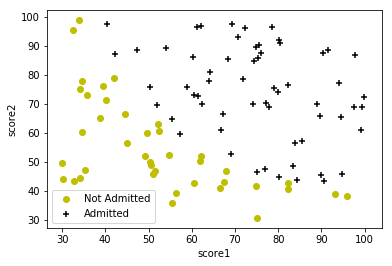

0.6931471805599453 [ -0.1        -12.00921659 -11.26284221]


In [4]:
data = load_data('ex2data1.txt')
draw_data(data)

X = data[:,:-1]
X = np.hstack((np.ones((X.shape[0],1)),X)) #加一列
m = X.shape[0]   # 行数
Y = data[:,-1:]
theta = np.zeros((X.shape[1],1))
print(cost_function(theta,X,Y),gradient(theta, X, Y))

In [5]:
# 使用optimize函数，自动计算
from scipy import optimize
# 使用 BFGS
# res = optimize.minimize(cost_function,x0=theta,args=(X,Y),method='BFGS',jac=gradient,options={'gtol': 1e-6, 'disp': True})
# 使用梯度下降
res = optimize.fmin_cg(cost_function,x0=theta,fprime=gradient,args=(X,Y)) # cost个gradient的第一个参数必须是theta
print(res) # 第一个值返回的是最优的theta数组

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 50
         Function evaluations: 120
         Gradient evaluations: 120
[-25.16134333   0.2062318    0.20147167]


f:\python\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
f:\python\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


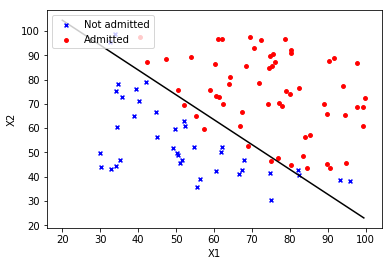

In [6]:
# 可视化决策边界
draw_result(X,Y)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]
[1 1 1 1 1]


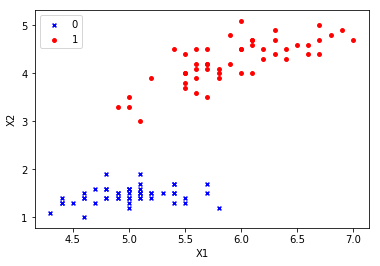

In [7]:
# 后续可以用iris数据集去测试
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
data = iris.data
target = iris.target

X = data[0:100,[0,2]]
y = target[0:100]
print(X[:5])
print(y[-5:])
label = np.array(y)
index_0 = np.where(label.ravel()==0)
plt.scatter(X[index_0,0],X[index_0,1],marker='x',color = 'b',label = '0',s = 15)
index_1 =np.where(label.ravel()==1)
plt.scatter(X[index_1,0],X[index_1,1],marker='o',color = 'r',label = '1',s = 15)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()

